<a href="https://colab.research.google.com/github/Glory-AI/CodeDocumentationRep-/blob/main/Classes_%26_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Base class
class VoltageTracker:
  """ Creates a class to track voltage-current readings. It will house the readings in a dictionary.
  """
  def __init__(self):  #class constructor method
        self.data = {}  # empty dic to store voltage-current pairs

  def add_reading(self, voltage, current): #a function in the class
        self.data[voltage] = current  # add a new voltage-current reading

  def get_current(self, voltage): #searches for current that matches given voltage
        return self.data.get(voltage, "Voltage not found!") # If the voltage is present, the function returns the associated value; otherwise, it returns the specified default value: Voltage not found

  def show_all_readings(self):
        for voltage, current in sorted(self.data.items()): #sorts the dictionary by voltage (smallest to biggest) to make the output organized
            print(f"Voltage: {voltage}V -> Current: {current}A")


# Subclass that searches for closest voltage if exact not found)
class SmartVoltageTracker(VoltageTracker):
    def __init__(self):
        super().__init__()
    def find_closest_voltage(self, target_current):
        # Finds the voltage whose current is closest to the target current
        if not self.data:
            return "No data available!"

        closest_voltage = None
        #our readings are in decimals(float)
        smallest_difference = float('inf') #smallest_difference starts as infinity (inf) so that any real difference will be smaller than it

        for voltage, current in self.data.items():
            diff = abs(current - target_current)
            if diff < smallest_difference:
                smallest_difference = diff
                closest_voltage = voltage

        return f"Closest voltage for desired current ({target_current}A) is {closest_voltage}V with current {self.data[closest_voltage]}A"

In [8]:
# Example Usage:
tracker = SmartVoltageTracker()

# Adding some experimental data using the add_reading class function
tracker.add_reading(3.3, 0.5)
tracker.add_reading(5.0, 0.7)
tracker.add_reading(9.0, 1.2)
tracker.add_reading(12.0, 1.5)

# Showing all data
print("All readings:")
tracker.show_all_readings()

print("\nGetting current for a specific voltage:")
print(tracker.get_current(5.0))  # Expected: 0.7A

print("\nFinding closest voltage for a desired current:")
print(tracker.find_closest_voltage(1.0))  # Should find the best match!

All readings:
Voltage: 3.3V -> Current: 0.5A
Voltage: 5.0V -> Current: 0.7A
Voltage: 9.0V -> Current: 1.2A
Voltage: 12.0V -> Current: 1.5A

Getting current for a specific voltage:
0.7

Finding closest voltage for a desired current:
Closest voltage for desired current (1.0A) is 9.0V with current 1.2A


In [9]:
import matplotlib.pyplot as plt
import numpy as np

#implementing a class and plotting example
class VoltageTracker(object):
    """Class for tracking voltage and current experiments"""

    def __init__(self):
        self._voltages = []  # list to store voltages
        self._currents = []  # list to store currents
        self._legend = "Voltage vs Current Experiment"  #a linked to b(can be seen below)

    def add_reading(self, voltage, current):
        self._voltages.append(voltage)
        self._currents.append(current)

    def get_total_readings(self): #since voltage and current are pairs, this will return total reading of both
        return len(self._voltages)

    def __str__(self):
        return self._legend + " with " + str(self.get_total_readings()) + " readings" # will show the legend (description) instead of a weird object memory address.
               #b linked to a
    def plot_voltage_vs_current(self, style):
        plt.plot(self._voltages, self._currents, style, label=self._legend)
        plt.xlabel('Voltage (V)')
        plt.ylabel('Current (A)')
        plt.title('Voltage vs Current Graph')
        plt.legend()

    def plot_current_distribution(self, style):
        plt.hist(self._currents, bins=10, edgecolor='black', label=self._legend)
        plt.xlabel('Current (A)')
        plt.ylabel('Frequency')
        plt.title('Current Distribution')
        plt.legend()

    def plot_voltage_distribution(self, style):
        plt.hist(self._voltages, bins=10, edgecolor='black', label=self._legend)
        plt.xlabel('Voltage (V)')
        plt.ylabel('Frequency')
        plt.title('Voltage Distribution')
        plt.legend()

Total readings collected: 1000


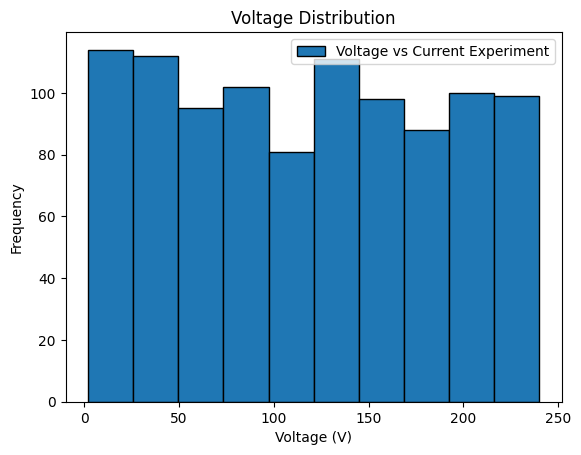

In [14]:
# Create instance of class defined above
tracker = VoltageTracker()

# Generate 1000 random voltage-current pairs

np.random.seed(42)  # for reproducibility
voltages = np.random.uniform(low=1.0, high=240.0, size=1000)  # voltages between 1V and 240V
currents = np.random.uniform(low=0.01, high=10.0, size=1000)   # currents between 0.01A and 10A

# Add readings to the tracker
for v, c in zip(voltages, currents): #zip combines elements from voltages and currents lists into pairs
    tracker.add_reading(v, c)

print(f"Total readings collected: {tracker.get_total_readings()}")

# Plot the results

tracker.plot_voltage_distribution(style='r')  # red bars

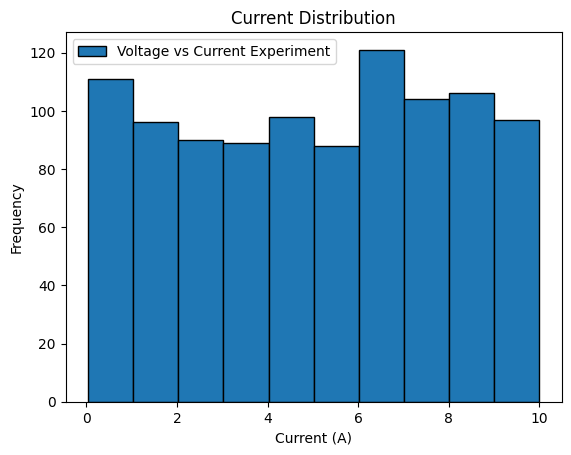

In [15]:

tracker.plot_current_distribution(style='g')  # green bars

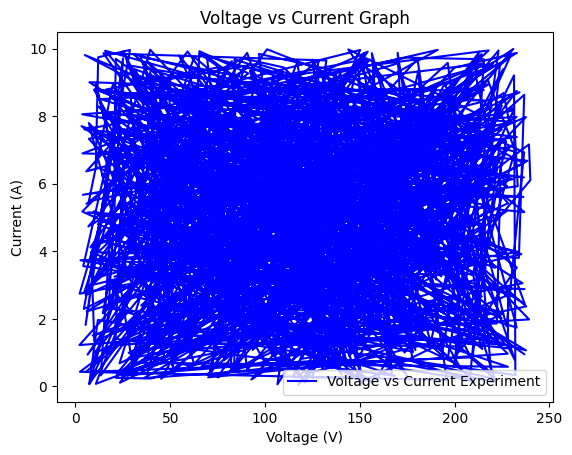

In [16]:
tracker.plot_voltage_vs_current(style='b-')   # blue solid line
#RANDOM